In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_raw = df.copy()

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Finding which of the above column(s) has/have null values?

In [6]:
df_raw.isna().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

#### Ans: Rating, Current Ver, Android Ver, Type, Content Rating

## Cleaning the Rating column and the other columns containing null values

- Remove the invalid values from Rating (if any). Just set them as NaN. <br>
- Fill the null values in the Rating column using the mean()<br>
- Clean any other non-numerical columns by just dropping the values.<br>

#### Remove the invalid values from Rating (if any). Just set them as NaN.

<Axes: >

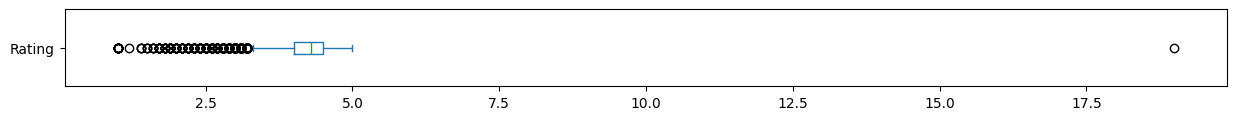

In [7]:
df['Rating'].plot(kind = 'box', vert = False, figsize=(15, 1))

In [8]:
df.loc[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df.loc[df['Rating'] > 5, 'Rating'] = np.nan

<Axes: >

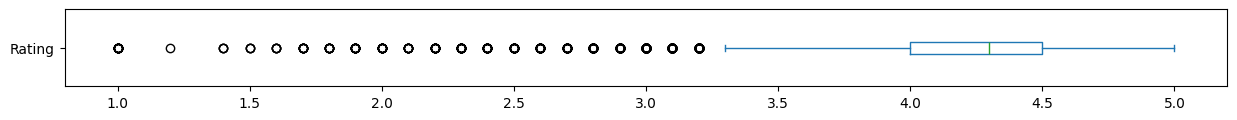

In [10]:
df['Rating'].plot(kind = 'box', vert = False, figsize=(15, 1))

#### Fill the null values in the Rating column using the mean()

In [11]:
df['Rating'].mean()

4.191757420456972

In [12]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [13]:
df['Rating'].isna().sum()

0

#### Clean any other non-numerical columns by just dropping the values.

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(10829, 13)

In [16]:
(df_raw.shape[0]) - (df.shape[0])

12

#### Ans: 12 rows dropped

## Cleaning the column Reviews and make it numeric

In [17]:
df_raw['Reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype 
--------------  ----- 
10841 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


In [18]:
df_raw[df_raw['Reviews'].astype(str).str.contains('[a-zA-Z]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
df['Reviews'].str.contains("M").any()

False

#### Row 10472 got dropped because of null values in 'Content Rating' and 'Android Ver'
#### No other String left in 'Reviews'. Can be converted to numeric

In [20]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [21]:
df['Reviews'].info()

<class 'pandas.core.series.Series'>
Index: 10829 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10829 non-null  int64
dtypes: int64(1)
memory usage: 169.2 KB


## How many duplicated apps are there?

In [22]:
df.loc[df.duplicated(subset = ['App'], keep = False)].sort_values(by = 'App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


#### Ans: 1979 duplicated Apps

## Droping duplicated apps keeping only the ones with the greatest number of reviews

In [23]:
df.sort_values(by = ['App','Reviews'], ascending = [True, False], inplace = True)

In [24]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.191757,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.500000,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.500000,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.700000,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.191757,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.800000,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.600000,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.000000,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [25]:
df.drop_duplicates(subset=['App'], keep='first', inplace = True)

#### Ans: 1181 duplicated rows dropped

## Format the Category column

Categories are all uppercase and words are separated using underscores. Instead, we want them with capitalized in the first character and the underscores transformed as whitespaces.
<br>
Example, the category AUTO_AND_VEHICLES should be transformed to: Auto and vehicles. Also, if you find any other wrong value transform it into an Unknown category.

In [26]:
df['Category']

8884           SPORTS
8532           SOCIAL
324            COMICS
4541            TOOLS
4636    COMMUNICATION
            ...      
6334    VIDEO_PLAYERS
4362        LIFESTYLE
2575           SOCIAL
7559            TOOLS
882     ENTERTAINMENT
Name: Category, Length: 9648, dtype: object

In [27]:
df['Category'] = df['Category'].str.capitalize()

In [28]:
df['Category'] = df['Category'].str.replace('_',' ')

In [29]:
df['Category'].value_counts()

Category
Family                 1870
Game                    946
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               107
Entertainment            87
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Name: count, dtype: int64

## Cleaning and converting the Installs column to numeric type

In [30]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',', '')

In [31]:
df['Installs']

8884        500
8532    1000000
324       10000
4541      10000
4636      10000
         ...   
6334     100000
4362      10000
2575    1000000
7559      10000
882     1000000
Name: Installs, Length: 9648, dtype: object

In [32]:
df[df['Installs'].astype(str).str.contains('[a-zA-Z]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [33]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [34]:
df['Installs'].info()

<class 'pandas.core.series.Series'>
Index: 9648 entries, 8884 to 882
Series name: Installs
Non-Null Count  Dtype
--------------  -----
9648 non-null   int64
dtypes: int64(1)
memory usage: 150.8 KB


#### Dtype changed to Integer

## Cleaning and converting the Size column to numeric (representing bytes)

The Size column is of type object. Some values contain either a M or a k that indicate Kilobytes (1024 bytes) or Megabytes (1024 kb). These values should be transformed to their corresponding value in bytes. For example, 898k will become 919552 (898 * 1024).

Some other values are completely invalid (there's no way to infer the numeric type from them). For these, just replace the value for 0.

Some other rules are related to + modifiers, apply the same rules as the previous task.

In [35]:
df_copy_1 = df.copy()

In [36]:
df['Size'].head()

8884    3.6M
8532     22M
324     9.1M
4541    203k
4636     53M
Name: Size, dtype: object

In [37]:
df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', '')

4541    203
4897    371
6671    243
4871    239
5035     78
       ... 
5482    655
7370    898
9333    118
8148    881
5832    549
Name: Size, Length: 310, dtype: object

In [38]:
pd.to_numeric(df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', ''))

4541    203.0
4897    371.0
6671    243.0
4871    239.0
5035     78.0
        ...  
5482    655.0
7370    898.0
9333    118.0
8148    881.0
5832    549.0
Name: Size, Length: 310, dtype: float64

In [39]:
(pd.to_numeric(df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', '')))*1024

4541    207872.0
4897    379904.0
6671    248832.0
4871    244736.0
5035     79872.0
          ...   
5482    670720.0
7370    919552.0
9333    120832.0
8148    902144.0
5832    562176.0
Name: Size, Length: 310, dtype: float64

In [40]:
df.loc[df['Size'].str.contains('k'), 'Size'] = (pd.to_numeric(df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', ''))*1024).astype(str)

In [41]:
df['Size'].str.contains('k').sum()

0

In [42]:
df['Size'].head()

8884        3.6M
8532         22M
324         9.1M
4541    207872.0
4636         53M
Name: Size, dtype: object

#### All the 'k' values are replaced with Bytes now

In [43]:
#df_copy_2 = df.copy()

In [44]:
df['Size'].str.contains('M').sum()

8111

In [45]:
df.loc[df['Size'].str.contains('M'), 'Size'].str.replace('M', '')

8884    3.6
8532     22
324     9.1
4636     53
5940     14
       ... 
6334     59
4362     26
2575     18
7559    3.2
882     4.0
Name: Size, Length: 8111, dtype: object

In [46]:
df.loc[df['Size'].str.contains('M'), 'Size'] = (pd.to_numeric(df.loc[df['Size'].str.contains('M'), 'Size'].str.replace('M', ''))*(1024*1024)).astype(str)

In [47]:
df['Size'].str.contains('M').sum()

0

#### All the 'M' values are replaced with Bytes now

## Replacing All the rest of the string values with the mean of the size.

In [48]:
df[df['Size'].astype(str).str.contains('[a-zA-Z]')].value_counts('Size')

Size
Varies with device    1227
Name: count, dtype: int64

In [49]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [50]:
mean_size = df.loc[df['Size'] != 'Varies with device', 'Size'].mean().round(1)
mean_size

21408503.5

In [51]:
df['Size'].isna().sum()

1227

In [52]:
df['Size'] = df['Size'].fillna(mean_size)

In [53]:
df['Size'].info()

<class 'pandas.core.series.Series'>
Index: 9648 entries, 8884 to 882
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
9648 non-null   float64
dtypes: float64(1)
memory usage: 150.8 KB


In [54]:
df['Size'].isna().sum()

0

In [55]:
pd.to_numeric(df['Size'])

8884     3774873.6
8532    23068672.0
324      9542041.6
4541      207872.0
4636    55574528.0
           ...    
6334    61865984.0
4362    27262976.0
2575    18874368.0
7559     3355443.2
882      4194304.0
Name: Size, Length: 9648, dtype: float64

In [56]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115,9542041.6,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


## Cleaning and converting the Price column to numeric

In [57]:
df['Price'] = df['Price'].str.replace('Free','').str.replace('$','')
df['Price']

8884         0
8532         0
324          0
4541         0
4636         0
         ...  
6334         0
4362    399.99
2575         0
7559         0
882          0
Name: Price, Length: 9648, dtype: object

In [58]:
df['Price'] = pd.to_numeric(df['Price'])

In [59]:
df['Price'].info()

<class 'pandas.core.series.Series'>
Index: 9648 entries, 8884 to 882
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
9648 non-null   float64
dtypes: float64(1)
memory usage: 150.8 KB


# Analysis on the Cleaned Data

## Which app has the most reviews?

In [60]:
df.sort_values(by = 'Reviews', ascending = False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,Social,4.1,78158306,21408503.5,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


#### Ans: Facebook

## What category has the highest number of apps uploaded to the store?

In [61]:
df['Category'].value_counts(ascending = False).head()

Category
Family      1870
Game         946
Tools        827
Business     420
Medical      395
Name: count, dtype: int64

#### Ans: Family

## To which category belongs the most expensive app?

In [62]:
df.sort_values(by = 'Price', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275,7654604.8,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5358,I am Rich!,Finance,3.8,93,23068672.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5356,I Am Rich Premium,Finance,4.1,1867,4928307.2,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5362,I Am Rich Pro,Family,4.4,201,2831155.2,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
4197,most expensive app (H),Family,4.3,6,1572864.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up


#### Ans: Lifestyle

## What's the name of the most expensive game?

In [63]:
df.loc[df['Category'] == 'Game'].sort_values(by = 'Price', ascending = False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4203,The World Ends With You,Game,4.6,4108,13631488.0,10000,Paid,17.99,Everyone 10+,Arcade,"December 14, 2015",1.0.4,4.0 and up


#### Ans: "The World Ends With You"

## Which is the most installed Finance App?

In [64]:
df.loc[df['Category'] == 'Finance'].sort_values(by = 'Installs', ascending = False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5601,Google Pay,Finance,4.2,348132,21408503.5,100000000,Free,0.0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device


#### Ans: 	Google Pay

## What Teen Game has the most reviews?

In [65]:
df.loc[(df['Category'] == 'Game') & (df['Content Rating'] == 'Teen')].sort_values(by = 'Reviews', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3912,Asphalt 8: Airborne,Game,4.5,8389714,96468992.0,100000000,Free,0.0,Teen,Racing,"July 4, 2018",3.7.1a,4.0.3 and up
5417,Mobile Legends: Bang Bang,Game,4.4,8219586,103809024.0,100000000,Free,0.0,Teen,Action,"July 24, 2018",1.2.97.3042,4.0.3 and up
1988,Hungry Shark Evolution,Game,4.5,6074627,104857600.0,100000000,Free,0.0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
10327,Garena Free Fire,Game,4.5,5534114,55574528.0,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
3967,Pixel Gun 3D: Survival shooter & Battle Royale,Game,4.5,4487182,57671680.0,50000000,Free,0.0,Teen,Action,"July 4, 2018",15.1.2,4.0.3 and up


#### Ans: Asphalt 8: Airborne

## Which is the free game with the most reviews?

In [66]:
df.loc[(df['Category']=='Game') & (df['Type']=='Free')].sort_values(by='Reviews',ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1879,Clash of Clans,Game,4.6,44893888,102760448.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1872,Subway Surfers,Game,4.5,27725352,79691776.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1878,Clash Royale,Game,4.6,23136735,101711872.0,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1869,Candy Crush Saga,Game,4.4,22430188,77594624.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1908,My Talking Tom,Game,4.5,14892469,21408503.5,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up


#### Ans: Clash of Clans

## How many Tb (tebibytes) were transferred (overall) for the most installed Lifestyle app

In [74]:
df.loc[df['Category'] == 'Lifestyle'].sort_values(by='Installs', ascending=False).assign(TB=lambda x: (x['Size'] * x['Installs']) / (1024 ** 4)).round({'TB': 1}).head(1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,TB
4587,Tinder,Lifestyle,4.0,2789775,71303168.0,100000000,Free,0.0,Mature 17+,Lifestyle,"August 2, 2018",9.5.0,4.4 and up,6485.0


#### Ans: 6485.0 TB

# Google Play Store Data Cleaning and Analysis

This project focuses on cleaning and analyzing data from the Google Play Store dataset using Python and pandas. The dataset contains information about various mobile applications available on the Google Play Store, such as app names, categories, ratings, reviews, sizes, installs, prices, and more.

## Dataset Description

The dataset (`googleplaystore.csv`) includes the following columns:

1. App: Name of the application
2. Category: Category to which the app belongs
3. Rating: Rating of the app
4. Reviews: Number of reviews for the app
5. Size: Size of the app
6. Installs: Number of installs for the app
7. Type: Free or Paid
8. Price: Price of the app
9. Content Rating: Content rating of the app
10. Genres: Genres to which the app belongs
11. Last Updated: Date when the app was last updated
12. Current Ver: Current version of the app
13. Android Ver: Required Android version

## Project Overview

The project involves the following steps:

1. Data Cleaning:
   - Handling missing values
   - Cleaning column datatypes
   - Converting categorical data to the appropriate format
   - Removing duplicates
   - Cleaning and converting numerical columns
   - Analyzing and fixing invalid or inconsistent data

2. Data Analysis:
   - Analyzing the most reviewed app
   - Identifying the category with the highest number of apps
   - Finding the most expensive app and game
   - Determining the most installed finance app
   - Analyzing teen games with the most reviews
   - Finding the free game with the most reviews
   - Calculating the total transfer in tebibytes (TB) for the most installed lifestyle app

## Libraries

- pandas
- numpy
- seaborn


